# Credit Card Clustering Using K-means

Business statment
This case requires to develop a customer segmentation so the company could know their focus for marketing strategy. we are expected to extract the different segments of customers based on the behavioral pattern provided in the dataset
This sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

get data here https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Lets begin by loading the required libraries and dataset

In [1]:
#importing the neccessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
credit_card = pd.read_csv(r'C:\Users\Master Ridwan\Desktop\my data\Creditcard.csv')

In [3]:
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#making a copy of the dataset
df = credit_card.copy()

In [5]:
#getting to know the number of rows and columns in the dataset
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
#checking for nan values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Data Preprocessing

Dealing with null values

In [9]:
#filling the nan values of both MINIMUM_PAYMENTS and CREDIT_LIMIT with median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace = True )     
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace = True )      


Since we wont be needing the customer_id for segmentation, lets drop the column.

In [10]:
#dropping the cust_id column
df.drop('CUST_ID', axis =1, inplace = True)

In [11]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

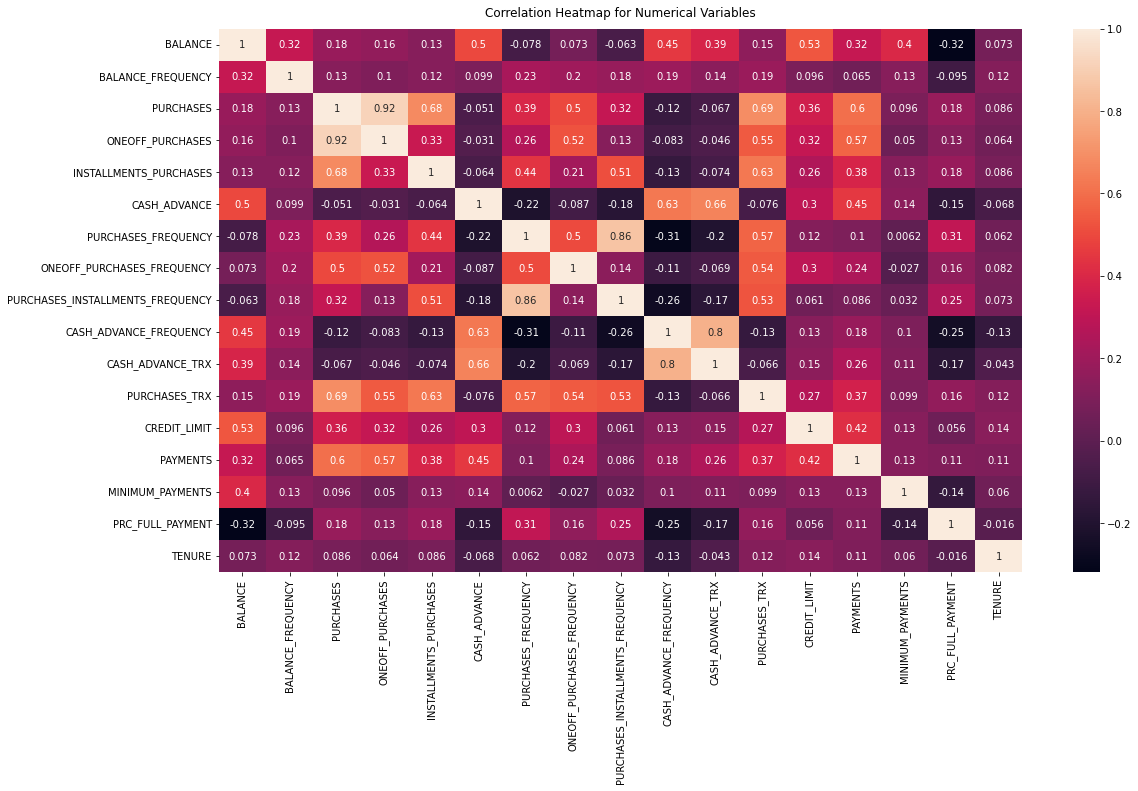

In [12]:
#heat map to find positive and negative correlations
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap for Numerical Variables', fontdict={'fontsize':12}, pad=12);

There is a correlation between 
- PURCHASES and one-off purchases, 'installment purchases, purchase transactions,and payments.
- Balance and cash_advance,Credit_limit
- PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY

Lets check out the skewness of the dataset via visualization (distplot and boxplot)

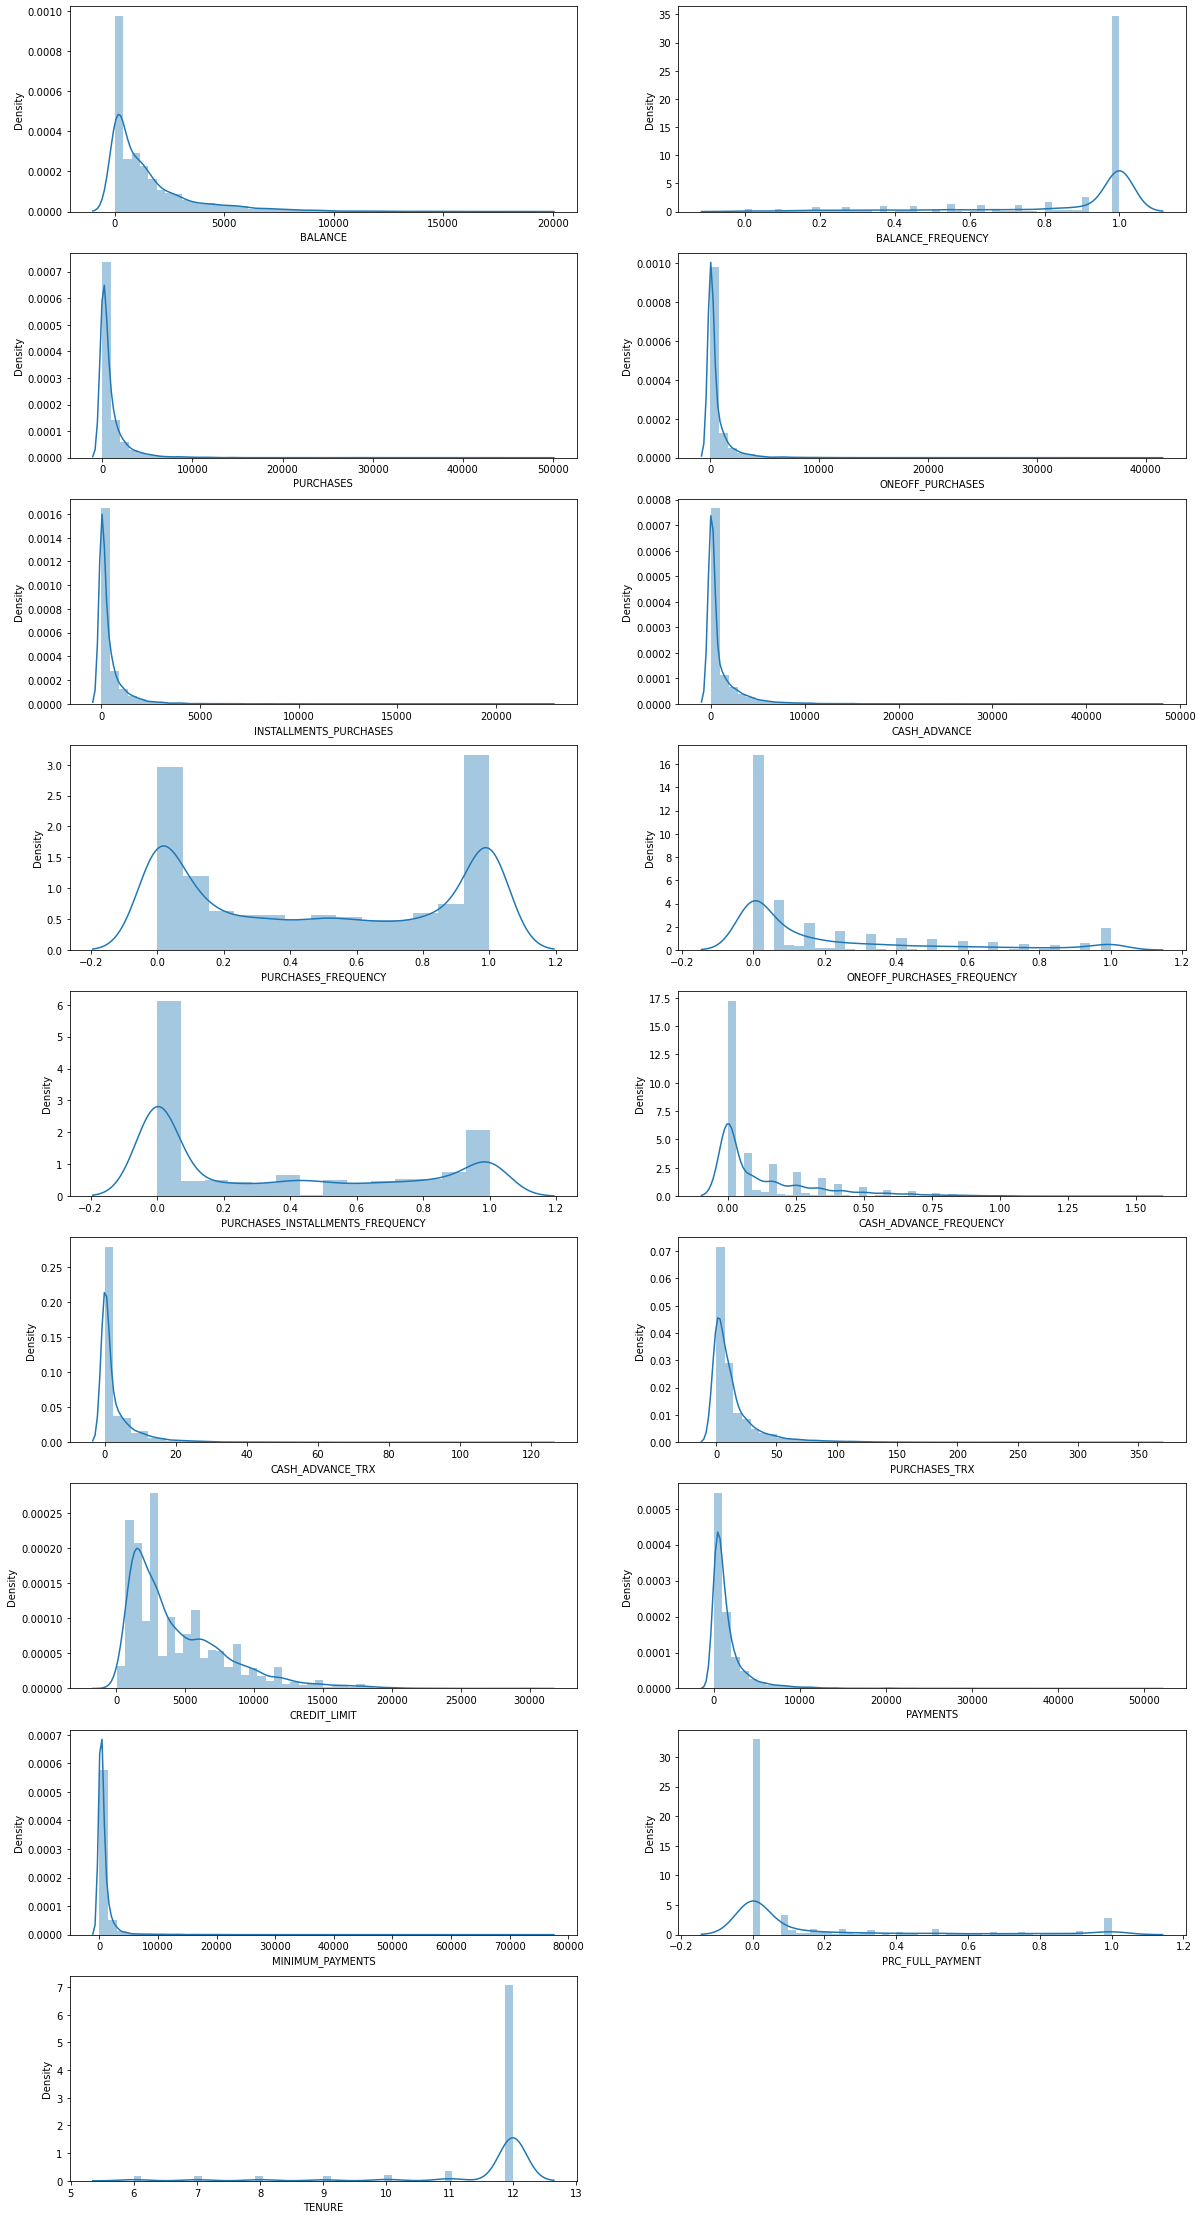

In [13]:
#plotting a distplot of every column
plt.rcParams['figure.figsize'] = (20,40)

for num in range (0,17):
    ax = plt.subplot(9,2, num+1)
    col = df.columns[num]
    sns.distplot(df[col], ax = ax)


Using box plot

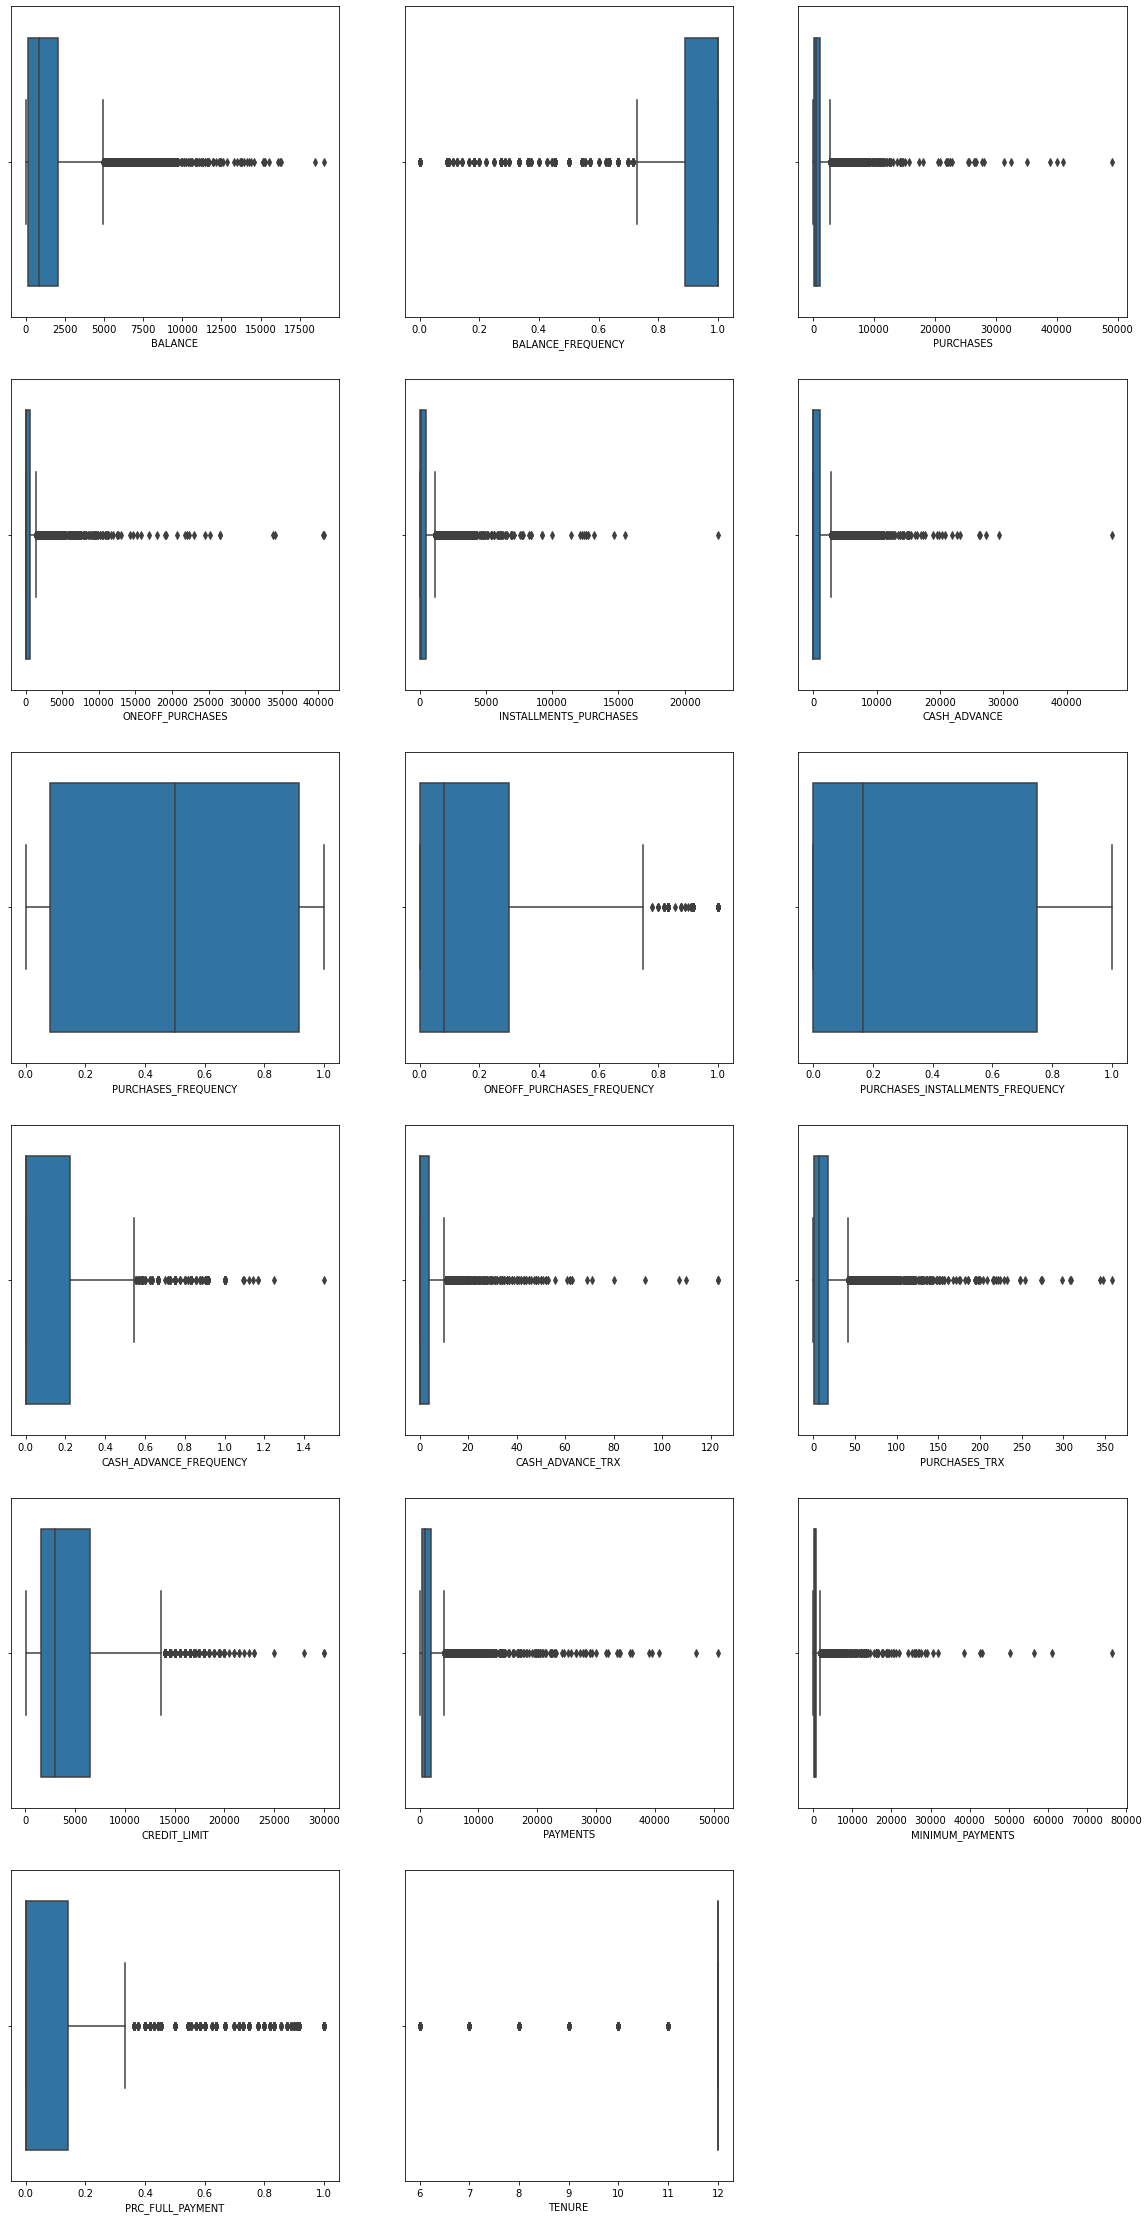

In [14]:
#plotting a boxplot for every column
plt.rcParams['figure.figsize'] = (20,40)

for num in range (0,17):
    ax = plt.subplot(6,3, num+1)
    col = df.columns[num]
    sns.boxplot(df[col], ax = ax)


- From both plots, it was very clear that the dataset has alot of skewed which is much expected.
The next step is to hanlde then skewness to have a balance distribution, hence, better clustering output. lets handle this using log transformation

Lets check out the relatioship between some features 

Text(0, 0.5, 'CASH_ADVANCE')

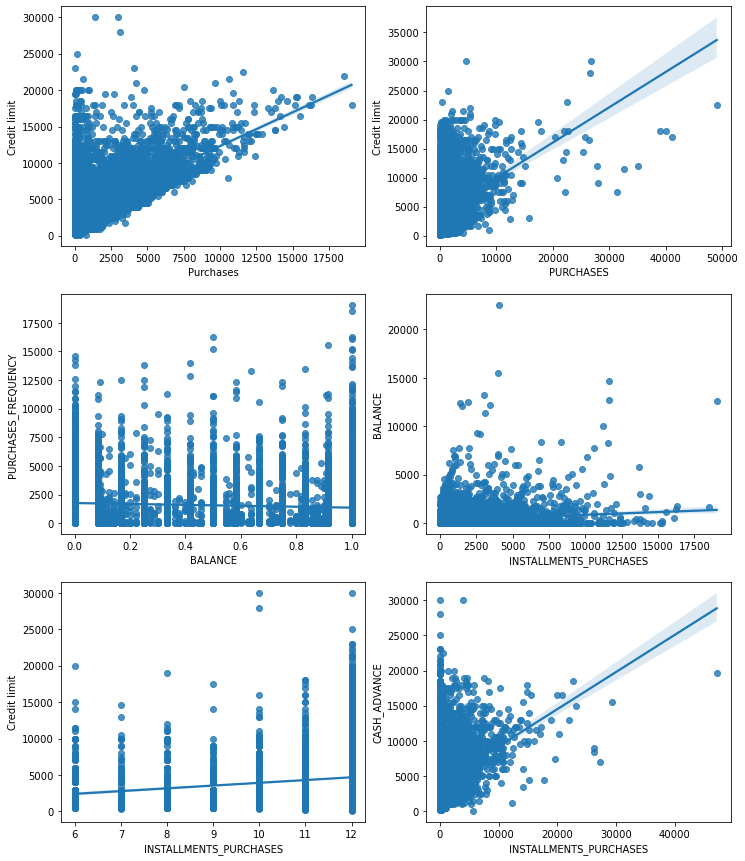

In [15]:
#Visualizing the relationship between some features
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(3,2,1)
sns.regplot(df['BALANCE'], df['CREDIT_LIMIT'])
plt.xlabel('Purchases')
plt.ylabel('Credit limit')


plt.subplot(3,2,2)
sns.regplot(df['PURCHASES'], df['CREDIT_LIMIT'])
plt.xlabel('PURCHASES')
plt.ylabel('Credit limit')

plt.subplot(3,2,3)
sns.regplot(df['PURCHASES_FREQUENCY'], df['BALANCE'])
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES_FREQUENCY')


plt.subplot(3,2,4)
sns.regplot(df['BALANCE'], df['INSTALLMENTS_PURCHASES'])
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('BALANCE')


plt.subplot(3,2,5)
sns.regplot(df['TENURE'], df['CREDIT_LIMIT'])
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('Credit limit')


plt.subplot(3,2,6)
sns.regplot(df['CASH_ADVANCE'], df['CREDIT_LIMIT'])
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('CASH_ADVANCE')


It shows there is linear relationship between
- credit limit and purchase
- credit limit and balance
- cash_advance and installments_purchases

### Data Normalization

In [16]:
#standardize the data
Scalar = StandardScaler()
scaled_df = Scalar.fit_transform(df)

#Normalizing the data
normalized_df = normalize(scaled_df)
#converting the numpy array into a dataframe
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312090,-0.106349,-0.181160,-0.152182,-0.148833,-0.199018,-0.343854,-0.289353,-0.301569,-0.287941,-0.202977,-0.218012,-0.409466,-0.225535,-0.128931,-0.224073,0.153779
1,0.219912,0.037536,-0.131214,-0.099743,-0.127029,0.728121,-0.341413,-0.189648,-0.256249,0.160391,0.030760,-0.165374,0.192447,0.228765,0.027246,0.065453,0.100790
2,0.126690,0.146792,-0.030506,0.030852,-0.128798,-0.132258,0.359794,0.757488,-0.259819,-0.191351,-0.134888,-0.030889,0.234065,-0.108746,-0.026433,-0.148908,0.102194
3,0.020495,-0.424496,0.096865,0.227990,-0.189749,-0.153883,-0.423316,-0.166684,-0.382772,-0.108075,-0.137554,-0.230234,0.344830,-0.249904,-0.095300,-0.219375,0.150555
4,-0.151657,0.218998,-0.195318,-0.146804,-0.192153,-0.197314,-0.428679,-0.168795,-0.387621,-0.285475,-0.201239,-0.233151,-0.382724,-0.154021,-0.108749,-0.222155,0.152462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146911,0.103140,-0.066352,-0.071058,-0.026407,-0.092927,0.252800,-0.135108,0.234881,-0.134448,-0.094776,-0.069759,-0.191192,-0.096796,-0.067936,0.235700,-0.820759
8946,-0.151357,0.105621,-0.067101,-0.072768,-0.025040,-0.095163,0.258881,-0.138358,0.240531,-0.137682,-0.097056,-0.071437,-0.195791,-0.102627,-0.046545,-0.107143,-0.840503
8947,-0.156995,-0.039329,-0.085233,-0.075685,-0.062529,-0.098978,0.181205,-0.143904,0.161251,-0.143202,-0.100946,-0.082832,-0.203640,-0.120994,-0.069311,0.069804,-0.874196
8948,-0.154340,-0.038416,-0.097253,-0.073928,-0.094151,-0.093069,-0.253049,-0.140563,-0.189927,0.032627,-0.037902,-0.122572,-0.227375,-0.120240,-0.070069,0.068183,-0.853902


### Dimension reduction

lets carry out dimension reduction in the dataset. the method we will be using is called Principal Component analysis (PCA). The PCA will help us reduce the number of variance in the dataset while preserving as much important information as possible

In [17]:
#dimension reduction
pca = PCA(n_components = 2)
prin_df = pca.fit_transform(normalized_df)
prin_df = pd.DataFrame(data = prin_df, columns = ['Principal Component 1', 'Principal Component 2'])
prin_df

,Principal Component 1,Principal Component 2
0,-0.490443,-0.679237
1,-0.518542,0.545284
2,0.330939,0.269024
3,-0.479448,-0.105319
4,-0.563829,-0.480941
...,...,...
8945,0.328634,-0.198555
8946,0.259831,-0.174047
8947,0.188685,-0.248606
8948,-0.313195,-0.171346


### K MEANS CLUSTERING 

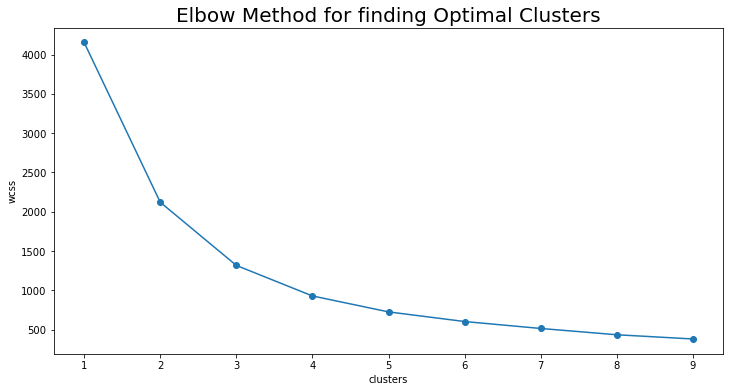

In [18]:
# using the elbow method to look for the best k
from sklearn.cluster import KMeans
km  = [KMeans(n_clusters = k,  random_state = 0).fit(prin_df) for k in range(1, 10)]
innertia = [model.inertia_ for model in km]
plt.figure(figsize = (12,6))   
plt.plot(range(1,10), innertia, marker = 'o')
plt.title('Elbow Method for finding Optimal Clusters',  fontsize = 20)
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

virtually, we can say the best k value would be 3. however, this can be confirmed by checking the silhoutte scores for the number of specific clusters

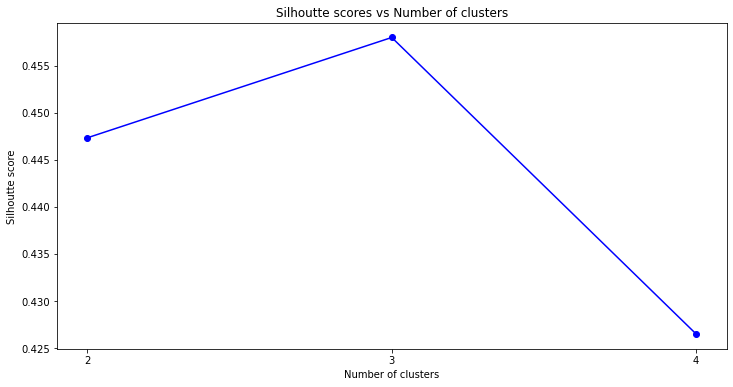

In [19]:
#checking for the silhoute_scores 
silhoute_scores = [silhouette_score(prin_df,model.labels_) for model in km[1:4]]
plt.figure(figsize = (12,6))  
plt.plot(range(2,5), silhoute_scores, 'bo-')
plt.xticks([2,3,4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Now, its obvious that the number of cluster 3 have the highest silhoutte score

### Model Evaluation

In [20]:
#printing the accurate silhoutte_score
kmc = KMeans(n_clusters = 3, random_state = 0)
kmc.fit_predict(prin_df)
print('Silhoutte score' + str(silhouette_score(prin_df, kmc.labels_)))

Silhoutte score0.45800964715862297


In [21]:
labels =  kmc.labels_

In [22]:
df['clusters'] = kmc.labels_
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,2
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,2


### Clusters Visualization

In [23]:
prin_df

,Principal Component 1,Principal Component 2
0,-0.490443,-0.679237
1,-0.518542,0.545284
2,0.330939,0.269024
3,-0.479448,-0.105319
4,-0.563829,-0.480941
...,...,...
8945,0.328634,-0.198555
8946,0.259831,-0.174047
8947,0.188685,-0.248606
8948,-0.313195,-0.171346


In [24]:
pca_df = pd.concat([prin_df, pd.DataFrame({'clusters':labels})], axis = 1)
pca_df

,Principal Component 1,Principal Component 2,clusters
0,-0.490443,-0.679237,2
1,-0.518542,0.545284,1
2,0.330939,0.269024,0
3,-0.479448,-0.105319,2
4,-0.563829,-0.480941,2
...,...,...,...
8945,0.328634,-0.198555,0
8946,0.259831,-0.174047,0
8947,0.188685,-0.248606,0
8948,-0.313195,-0.171346,2


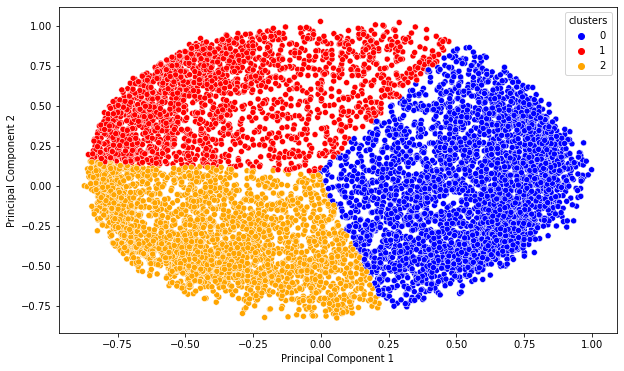

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='clusters',palette =['blue','red','orange'])

plt.show()

In [26]:
df['clusters'].value_counts()

0    3740
2    3184
1    2026
Name: clusters, dtype: int64

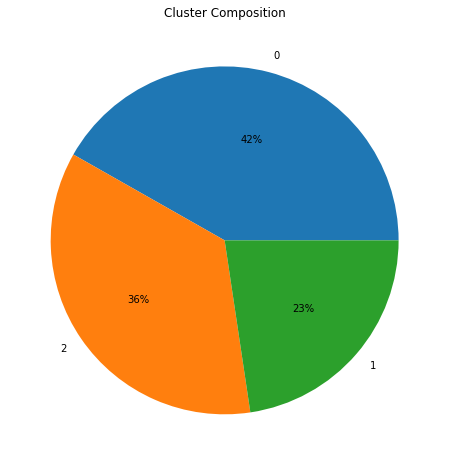

In [27]:
fig, axs = plt.subplots(figsize=(12,8))
ax = df['clusters'].value_counts().plot.pie(title='Cluster Composition', autopct='%1.0f%%')
plt.title=False
ax.set_ylabel('')
plt.show()